## Mô hình dự đoán quản lý chi tiêu 

Thông tin thành viên
| MSSV     | Họ và Tên        | Email                   |
|----------|------------------|-------------------------|
| 22520033 | Trương Huỳnh Thúy An | 22520033@gm.uit.edu.vn |
| 22520083 | Trịnh Thị Lan Anh  | 22520083@gm.uit.edu.vn |
| 22520148 | Huỳnh Thị Hải Châu  | 22520148@gm.uit.edu.vn |
| 22520363 | Lê Văn Giáp    | 22520363@gm.uit.edu.vn |
| 22520375 | Vương Dương Thái Hà | 22520375@gm.uit.edu.vn |


### Import Libraray

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   
from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv("data.csv", encoding='latin-1')
data

,Thu nh?p,C? ??nh,Nhu c?u,Giáo d?c,Thanh toán n?,Ti?t ki?m,B?n thân,a,b,c,d,e,f
0,7550000.0,3180000.0,0.0,1.0,0.0,1.0,0.0,0.441192,0.396550,0.021725,0.129350,0.000000,0.011183
1,7350000.0,2410000.0,0.0,1.0,0.0,0.0,1.0,0.347891,0.111428,0.384311,0.127250,0.000000,0.029119
2,7750000.0,2400000.0,0.0,0.0,0.0,1.0,0.0,0.329677,0.335039,0.137593,0.106540,0.000000,0.091150
3,7250000.0,3420000.0,0.0,1.0,0.0,1.0,0.0,0.491724,0.334125,0.024972,0.098846,0.000000,0.050333
4,9000000.0,2340000.0,0.0,1.0,0.0,1.0,0.0,0.280000,0.343637,0.149464,0.127305,0.000000,0.099593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17496,184460000.0,84170000.0,1.0,1.0,0.0,0.0,0.0,0.456305,0.082584,0.112523,0.122382,0.000000,0.245815
17497,187750000.0,88770000.0,0.0,0.0,1.0,0.0,0.0,0.472810,0.108436,0.147173,0.123760,0.000000,0.179752
17498,180920000.0,72630000.0,1.0,0.0,1.0,0.0,2000000.0,0.401448,0.094238,0.119465,0.110883,0.011055,0.294842
17499,187670000.0,84790000.0,1.0,0.0,0.0,0.0,1000000.0,0.451804,0.088712,0.140107,0.132531,0.005328,0.181518


In [3]:
data.isnull().sum()

Thu nh?p         0
C? ??nh          0
Nhu c?u          0
Giáo d?c         1
Thanh toán n?    2
Ti?t ki?m        2
B?n thân         2
a                2
b                2
c                2
d                4
e                4
f                4
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

Thu nh?p         0
C? ??nh          0
Nhu c?u          0
Giáo d?c         0
Thanh toán n?    0
Ti?t ki?m        0
B?n thân         0
a                0
b                0
c                0
d                0
e                0
f                0
dtype: int64

### Split Data

In [5]:
X = np.array(data)[:,0:7]
Y = np.array(data)[:,7:13]
print(X)
print(Y)

[[7.5500e+06 3.1800e+06 0.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [7.3500e+06 2.4100e+06 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [7.7500e+06 2.4000e+06 0.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.8092e+08 7.2630e+07 1.0000e+00 ... 1.0000e+00 0.0000e+00 2.0000e+06]
 [1.8767e+08 8.4790e+07 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+06]
 [1.9781e+08 1.0307e+08 1.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+06]]
[[0.44119205 0.39654965 0.02172527 0.12934956 0.         0.01118347]
 [0.34789116 0.11142825 0.38431147 0.12725029 0.         0.02911883]
 [0.32967742 0.33503878 0.13759292 0.10654045 0.         0.09115043]
 ...
 [0.40144815 0.09423791 0.11946486 0.11088306 0.01105461 0.29484235]
 [0.4518037  0.08871151 0.14010727 0.13253127 0.0053285  0.18151775]
 [0.52105556 0.09916272 0.11856276 0.11828351 0.00505536 0.18942045]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ", y_test.shape)


X_train:  (13997, 7)
X_test:  (3500, 7)
Y_train:  (13997, 6)
Y_test:  (3500, 6)


### Descale Data

In [7]:
# Tính các giá trị thống kê cơ bản
mean = np.mean(X_train, axis=0)
median = np.median(X_train, axis=0)
std_dev = np.std(X_train, axis=0)
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)

# Tạo DataFrame từ các giá trị thống kê
statics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Std Dev': std_dev,
    'Min Value': min_val,
    'Max Value': max_val
})

# Xếp chúng thành các hàng của các cột
statics_transpose = statics_df.transpose()

# In DataFrame đã xếp
print(statics_transpose)

                      0             1         2         3             4  \
Mean       9.522930e+07  4.260966e+07  0.412303  0.557834  1.461349e+06   
Median     8.766000e+07  3.449000e+07  0.000000  1.000000  0.000000e+00   
Std Dev    5.577966e+07  3.046577e+07  0.492249  0.496644  5.037026e+06   
Min Value  3.200000e+06  2.000000e+06  0.000000  0.000000  0.000000e+00   
Max Value  1.999400e+08  1.192200e+08  1.000000  1.000000  5.400000e+07   

                  5             6  
Mean       0.547760  2.528614e+06  
Median     1.000000  1.000000e+00  
Std Dev    0.497714  6.463077e+06  
Min Value  0.000000  0.000000e+00  
Max Value  1.000000  4.600000e+07  


In [8]:
def de_scale(data_scale):
    for i in range(len(data_scale)):
        data_scale[i] = data_scale[i] * (max_val[i] - min_val[i]) + min_val[i]
    return data_scale

### Preprocessing Data

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def ScalerData(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [10]:
X_train = ScalerData(X_train)
X_test = ScalerData(X_test)
print(X_train)
print(X_test)

[[7.05499644e-01 5.06227606e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.65217391e-01]
 [4.16844566e-01 1.58249445e-01 1.00000000e+00 ... 1.66666667e-01
  0.00000000e+00 2.17391304e-08]
 [8.86398292e-01 6.49803788e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 4.34782609e-02]
 ...
 [1.98027854e-01 2.14553830e-01 0.00000000e+00 ... 1.85185185e-02
  0.00000000e+00 0.00000000e+00]
 [7.82758971e-02 2.13274185e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.17391304e-08]
 [8.47971943e-01 7.72564409e-01 1.00000000e+00 ... 1.85185185e-08
  0.00000000e+00 0.00000000e+00]]
[[5.40631536e-01 4.20938125e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.17391304e-08]
 [4.13610162e-01 1.36106518e-01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 2.17391304e-08]
 [1.32632760e-02 6.61387173e-03 0.00000000e+00 ... 3.33333333e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [5.59353160e-01 5.16578192e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.17391304e-08]

### Define model Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adamax

def define_model():
    model = Sequential()
    
    # Layer 1
    model.add(Dense(256, input_dim=7, activation='relu'))
    
    # Layer 2
    model.add(Dense(512, activation='relu'))
    
    # Layer 3
    model.add(Dense(512, activation='relu'))

    # Layer 4
    model.add(Dense(6, activation='relu'))
    
    optimizer = Adamax(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

model = define_model()
model.summary()


c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,366 (1.52 MB)

 Trainable params: 399,366 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from sklearn.ensemble import RandomForestRegressor
def define_model_2():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    return model

### Train Model

In [13]:
import matplotlib.pyplot as plt

def train_and_plot_loss():
    model = define_model()
    history = model.fit(X_train, y_train, epochs=16, batch_size=8, validation_split=0.2, shuffle=True ,verbose=1)
    model.save('final_model.h5')
    
    # Lấy giá trị loss từ lịch sử huấn luyện
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Vẽ biểu đồ loss của cả hai tập train và validation
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, 'b', label='Training loss')  # Đường liên tục màu xanh
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Đường liên tục màu đỏ
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Random Forest

In [14]:
import joblib
def train2():
    model2 = define_model_2()
    model2.fit(X_train, y_train)
    joblib.dump(model2, 'random_forest_model.pkl')


### Train Model

In [15]:
train2()

Epoch 1/16


c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 2/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 11/16
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 12/16
1400/1400 ━━━━━━━━━━━━━━━━━━━

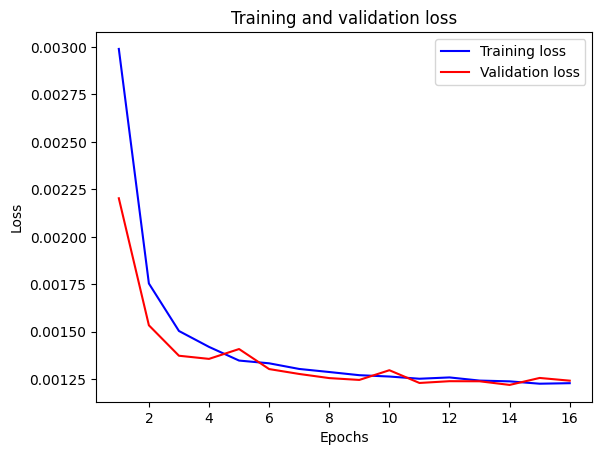

In [16]:
train_and_plot_loss()

### Dự đoán và đánh giá theo R^2 score

In [17]:
import sys
import os
from sklearn.metrics import r2_score

# Load model
model = load_model("final_model.h5")
model2 = joblib.load('random_forest_model.pkl')

# Tính toán R-squared
predict_1 = model.predict(X_test)
r_squared_1 = r2_score(y_test, predict_1)

predict_2 = model2.predict(X_test)
r_squared_2 = r2_score(y_test, predict_2)

print("R-square Neural Network: ", np.round(r_squared_1, decimals = 4))
print("R-square Random Forest: ", np.round(r_squared_2, decimals = 4))


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
R-square Neural Network:  0.7894
R-square Random Forest:  0.7735


### Đưa ra ouput

(a) Chi tiêu cố định: Tương ứng số tiền chi tiêu phục vụ cho nhu cầu chi tiêu cần thiết như tiền thuê nhà; tiền điện, nước; tiền ăn uống; xăng xe hoặc vé xe; tiền internet và điện thoại; …. Đảm bảo cho việc chi trả các khoản chi phí cần thiết thường ngày.

(b) Tiết kiệm: Tương ứng với số tiền chi tiêu phục vụ cho nhu cầu tiết kiệm và đầu tư như: tiết kiệm hưu trí, đầu tư cổ phiếu hoặc quỹ, những khoản chi tiêu lớn như mua nhà, mua xe, … 

(c) Bản thân: Tương ứng với số tiền chi tiêu phục vụ cho các hoạt động vui chơi, giải trí, thể thao, du lịch, mua sắm, đi ăn ngoài, nhà hàng, xem phim, …

(d) Giáo dục: Tương ứng với số tiền chi tiêu phục vụ cho mục tiêu giáo dục và phát triển bản thân: các khóa học; sách vở, tài liệu học tập; tham gia hội thảo, workshop; các khóa đào tạo nghề nghiệp hoặc kỹ năng mới, ...

(e) Thanh toán nợ: Tương ứng với số tiền chi tiêu phục vụ cho việc thanh toán các khoản vay nợ cần phải trả

(f) Khác: Tương ứng với số tiền chi tiêu phục vụ cho nhu cầu khác như: từ thiện, y tế, quà cáp, bảo trì, sửa chữa thiết bị, thú cưng và một số khoản chi tiêu phát sinh khác. 


In [18]:
# Tính MSE cho từng mẫu
mse_scores = []
for i in range(len(X_test)):
    mse = mean_squared_error([y_test[i]], [predict_1[i]])
    mse_scores.append(mse)

# Chuyển đổi thành mảng numpy để dễ dàng thao tác
mse_scores = np.array(mse_scores)
# Tạo output_matrix để xuất lưu giữ giá trị dự đoán
output_matrix = []
# Sắp xếp và chọn các mẫu có MSE thấp nhất
# Giả sử bạn muốn chọn 10 mẫu có MSE thấp nhất
top_n = 10
top_indices = np.argsort(mse_scores)[:top_n]

# Lưu các mẫu có MSE thấp nhất và các X_test tương ứng
top_samples = []
top_X_test = []
for idx in top_indices:
    top_samples.append({
        "Sample_index": idx,
        "True_value": y_test[idx],
        "Predicted_value": predict_1[idx],
        "MSE": mse_scores[idx]
    })
    top_X_test.append(X_test[idx])
    temp = []
    for item in de_scale(X_test[idx]):
        temp.append(item)
    for item in predict_1[idx]:
        temp.append(item *temp[0])
    output_matrix.append(temp)

df = pd.DataFrame(output_matrix, columns=["thu nhập",	"cố định",	"nhu cầu",	"giáo dục", "thanh toán nợ",
                                      	"tiết kiệm",	"bản thân",	"a",	"b",	"c",	"d",	"e",	"f"])
df = df.round()
pd.set_option('display.float_format', '{:.0f}'.format)
df



,thu nhập,cố định,nhu cầu,giáo dục,thanh toán nợ,tiết kiệm,bản thân,a,b,c,d,e,f
0,126374515,54912726,0,0,0,1,32000000,53872607,8526911,16467825,13568701,32652044,3106730
1,176144125,94635525,1,0,0,0,1000000,94442283,15229349,21279158,21290135,1715484,23873400
2,141970799,73907039,0,0,1,1,1000000,73614343,11990926,21179709,18637601,1571494,20245148
3,89682099,34459668,0,0,0,1,1,35101064,22074327,15141414,15108534,0,2120627
4,90344489,36550878,0,0,0,1,1,37114478,21979498,14370084,14345833,0,1987726
5,147821915,83414396,0,0,0,0,0,83364777,12496586,17262694,18135740,304632,16241709
6,125682016,71550601,0,1,0,0,5000000,71259812,9809599,14657946,19795970,5283396,10311184
7,125280567,65429985,0,1,0,0,16000000,65009495,8728238,14145237,19898042,16556243,6703995
8,175722604,90636723,0,1,0,1,0,91292735,15205107,28963047,25029402,307946,28395557
9,153913900,65419784,0,0,0,1,8000000,65204669,12577283,22025149,18347488,8498114,31226891
